In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai.vision import *
#from fastai.models.cifar10.resnext import resnext29_8_64
from fastai.metrics import error_rate
import torch
import tarfile
import pickle
import numpy as np


In [3]:
fastai.__file__

'e:\\programs\\python\\python36\\lib\\site-packages\\fastai\\__init__.py'

In [4]:
torch.cuda.is_available(),torch.cuda.current_device(),torch.cuda.get_device_name(torch.cuda.current_device())

(True, 0, 'GeForce GTX 1080')

In [5]:
path = untar_data(URLs.CIFAR,None, 'd:/.fastai/data'); path.ls()

[WindowsPath('d:/.fastai/data/cifar10/labels.txt'),
 WindowsPath('d:/.fastai/data/cifar10/models'),
 WindowsPath('d:/.fastai/data/cifar10/test'),
 WindowsPath('d:/.fastai/data/cifar10/train')]

In [ ]:
# Config.DEFAULT_CONFIG = {
#         'data_path': 'd:/.fastai/data',
#         'model_path': 'd:/.fastai/models'
#     }
# Config.create('d:/fastaiconfig.yml')
# Config.DEFAULT_CONFIG_PATH = 'd:/fastaiconfig.yml'
# path = Config.data_path()/'cifar-10'
# path.mkdir(parents=True, exist_ok=True)
# path


In [ ]:
# tfile = tarfile.open(path/'cifar-10-python.tar.gz')
# tfile.extractall(path),


In [ ]:
# def unpickle(file):
#     with open(file, 'rb') as fo:
#         dict = pickle.load(fo, encoding='bytes')
#     return dict

In [ ]:
# tfile.members

In [ ]:
# data_dir = path/'cifar-10-batches-py'
# train_data = None
# train_labels = []
# for i in range(1, 6):
#     data_dic = unpickle(data_dir/f'data_batch_{i}')
#     if i == 1:
#         train_data = data_dic[b'data']
#         train_labels = data_dic[b'labels']
#     else:
#         train_data = np.vstack((train_data, data_dic[b'data']))
#         train_labels = np.hstack((train_labels, data_dic[b'labels']))

# len(train_data),len(train_labels)

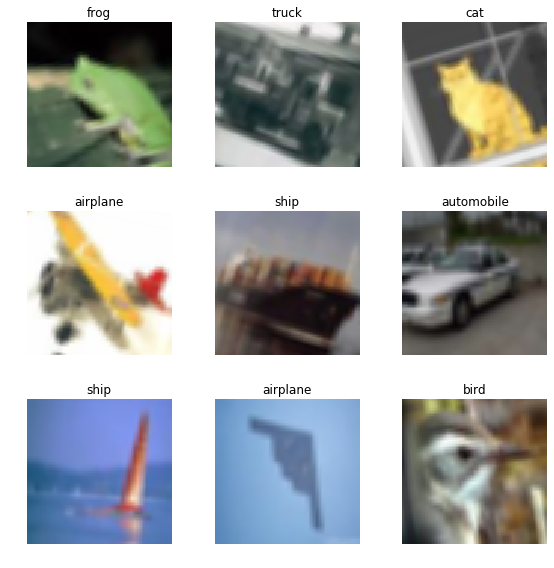

In [6]:
np.random.seed(1)
gc.collect()
tfms = get_transforms(flip_vert=False, max_rotate=20, p_affine =1., p_lighting=1., max_lighting=0.1, max_zoom=1.05, max_warp=0.)
img_size = 96
bs = 800
#data = ImageDataBunch.from_folder(path, valid = 'test', ds_tfms = tfms, size = img_size, bs = bs).normalize(imagenet_stats)
data = (ImageList.from_folder(path).split_by_folder(train = 'train', valid = 'test')
        .label_from_folder()
        .transform(tfms, size = img_size)
        .databunch(bs = bs)
        .normalize(cifar_stats))
data.show_batch(rows = 3, figsize = (8,8))


In [7]:
data.classes, data.c

(['airplane',
  'automobile',
  'bird',
  'cat',
  'deer',
  'dog',
  'frog',
  'horse',
  'ship',
  'truck'],
 10)

In [10]:
learn = cnn_learner(data, models.resnet34, metrics = Precision())
#learn.load('cifar10_resnext32x32_8')
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


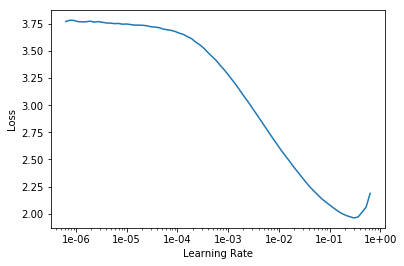

In [11]:
learn.recorder.plot()


In [12]:
learn.fit_one_cycle(8, 1e-3,wd=0.4, div_factor=6, pct_start=0.8)

epoch,train_loss,valid_loss,precision,time
0,1.711509,0.723792,0.765129,01:43
1,1.078438,0.485592,0.843492,01:41
2,0.751914,0.362489,0.884010,01:40
3,0.550344,0.304988,0.898149,01:41
4,0.431375,0.277489,0.908702,01:43
5,0.358918,0.251648,0.914081,01:41
6,0.311127,0.233416,0.919490,01:41
7,0.276875,0.227756,0.922137,01:40


e:\programs\python\python36\lib\site-packages\fastai\metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [13]:
learn.save('stage1')

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
losses, ids = interp.top_losses()
len(data.valid_ds) == len(losses) ==len(ids)

True

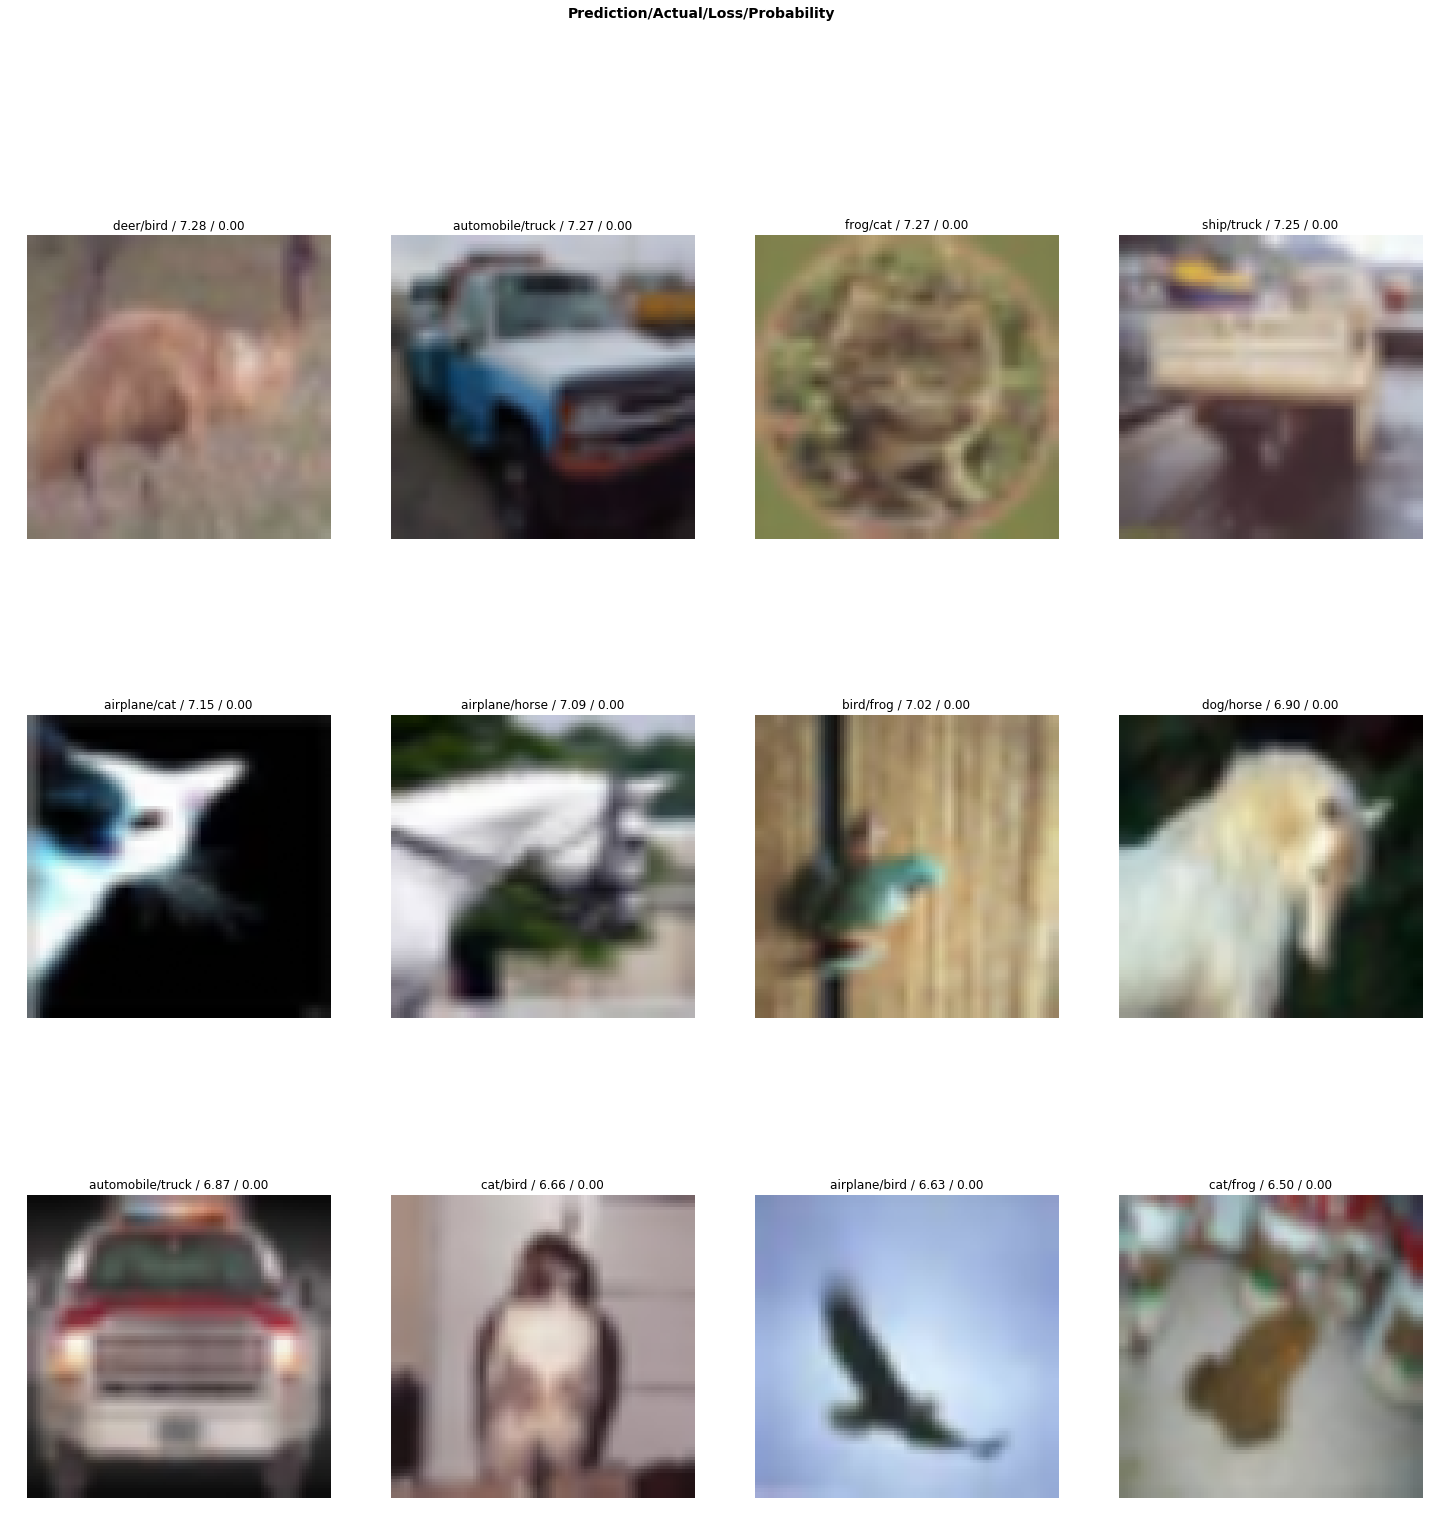

In [15]:
interp.plot_top_losses(12, figsize = (25,25))

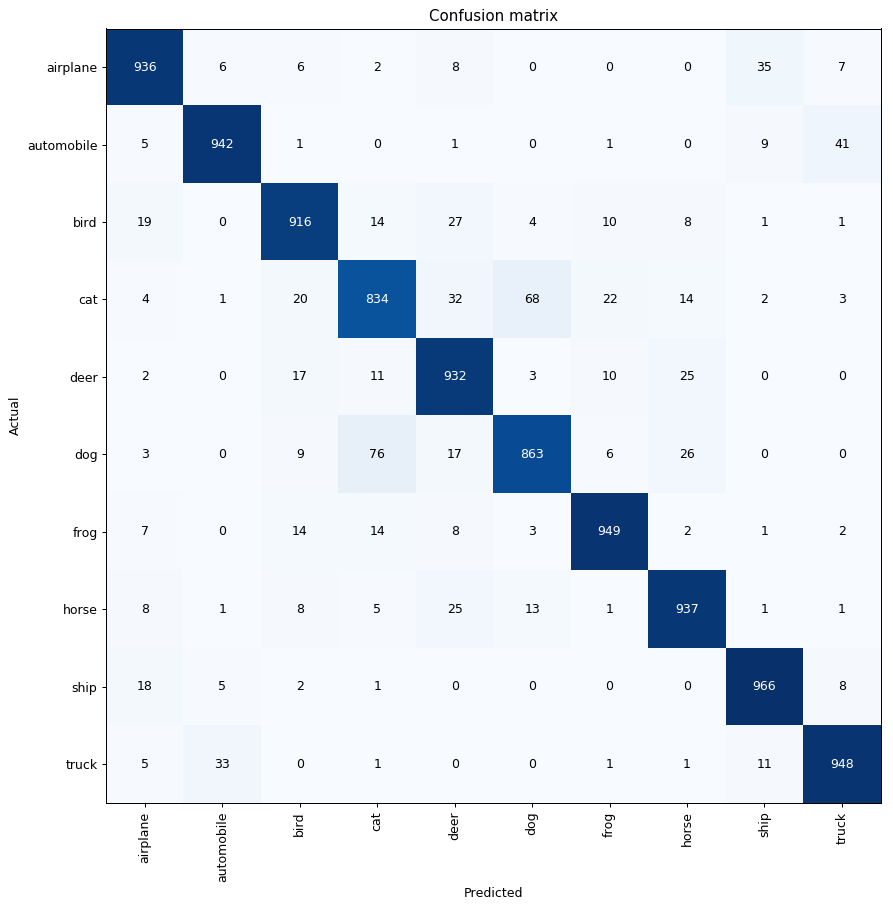

In [21]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=90)

In [22]:
learn.load('stage1')
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


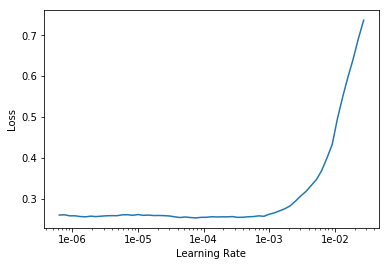

In [23]:
learn.lr_find()
learn.recorder.plot()

In [24]:

learn.fit_one_cycle(5,max_lr=slice(1e-3,1e-4),wd=0.4, div_factor=6, pct_start=0.8)

epoch,train_loss,valid_loss,precision,time
0,0.249129,0.202939,0.932330,01:48
1,0.201441,0.285268,0.908517,01:48
2,0.197711,0.395713,0.890828,01:48
3,0.199992,0.359639,0.894309,01:48
4,0.146869,0.168729,0.944651,01:48


In [25]:
interp = ClassificationInterpretation.from_learner(learn)
losses, ids = interp.top_losses()
len(data.valid_ds) == len(losses) ==len(ids)

True

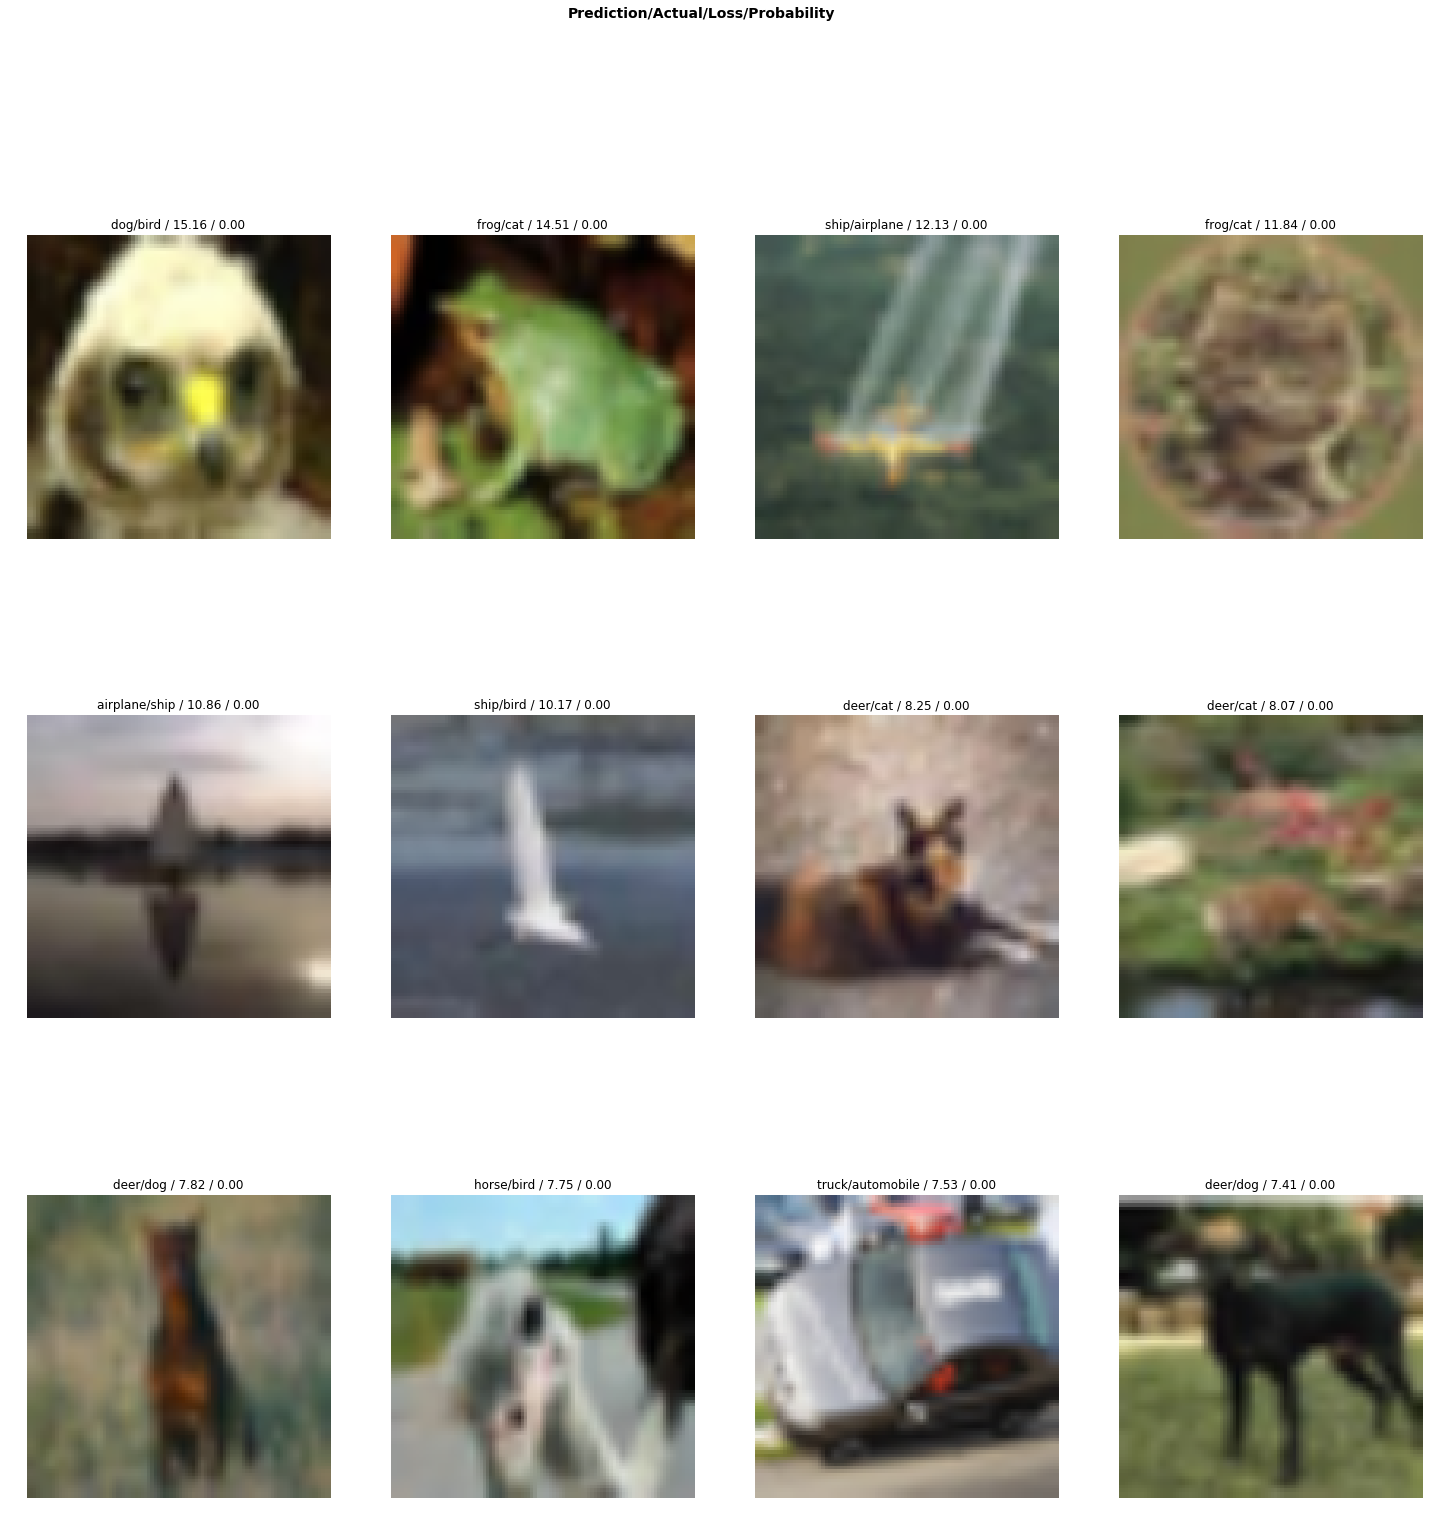

In [26]:
interp.plot_top_losses(12, figsize = (25,25))

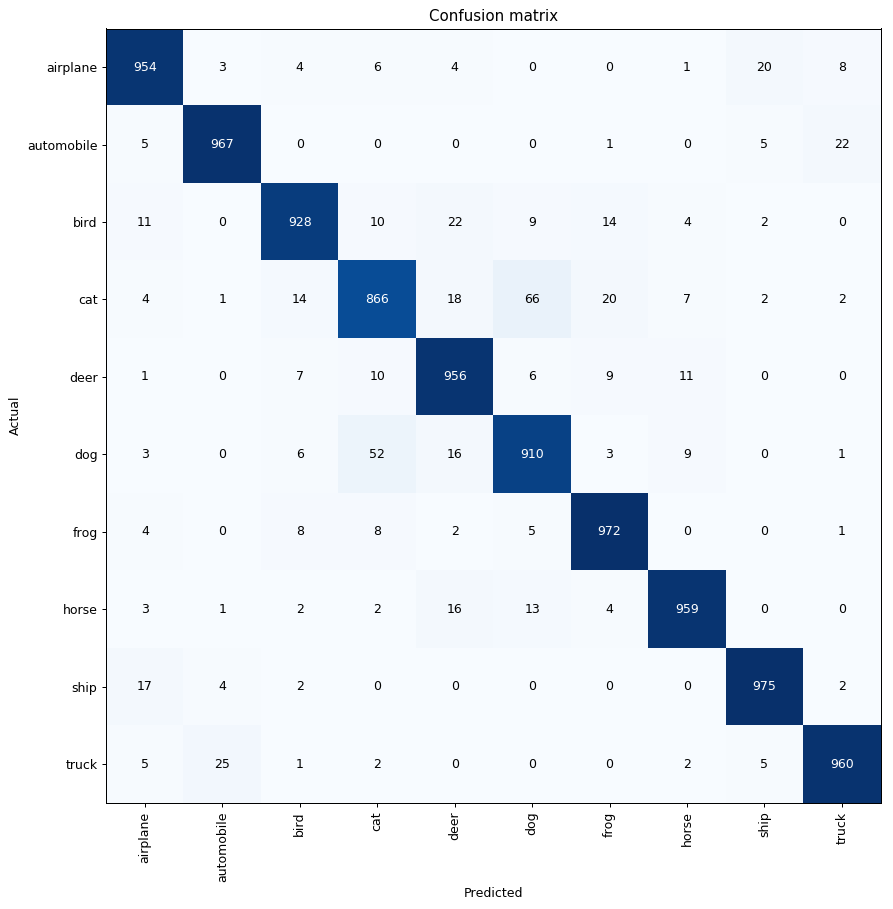

In [27]:
interp.plot_confusion_matrix(figsize=(10,10), dpi=90)